In [1]:
import networkit as nk


In [158]:
import networkit as nk
import matplotlib.pyplot as plt
import numpy as np
import glob

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

graph_folder = 'data/socfb/'
path = graph_folder + 'socfb-Brown11.SpaceOne'
g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)

data_dir = '/Users/benjidayan/Documents/GIRG_data/'

In [174]:
type(g) is nk.graph.Graph

True

In [175]:
type(pareto) is np.ndarray

True

<Figure size 800x400 with 0 Axes>

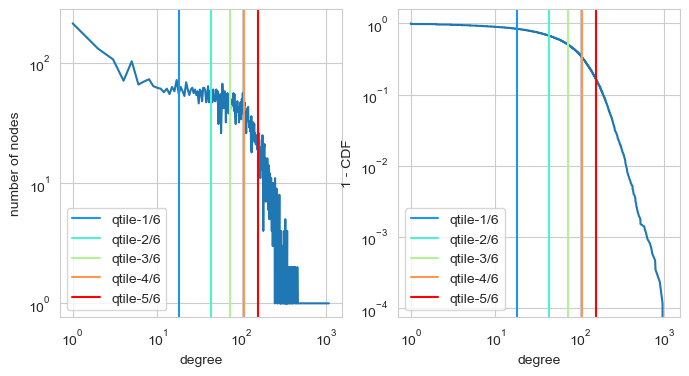

In [197]:
def plot_degree_dist(g, pl_fit=False, vlines=0):
    if type(g) is nk.graph.Graph:
        dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
    elif type(g) is np.ndarray and np.issubdtype(pareto_dd.dtype, np.integer):
        dd = sorted(np.ceil(g).astype(np.int64), reverse=True)
    else:
        raise Exception('g should be an nk Graph, or a np.ndarray of integers >=1')
    degrees, numberOfNodes = np.unique(dd, return_counts=True)
    # fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplot(121)
    # plt.sca(axes[0])
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("number of nodes")
    # plt.scatter(degrees, numberOfNodes, s=1.1, marker='x')
    plt.plot(degrees, numberOfNodes)
    if pl_fit:
        fit = powerlaw.Fit(dd)
        xmin, xmax = fit.xmin, fit.xmax
        fit_bin_edges, fit_bin_proportions = fit.pdf()
        fit_bin_middles = [np.mean((fit_bin_edges[i], fit_bin_edges[i+1]))
                    for i in range(len(fit_bin_edges)-1)]
        plt.plot(fit_bin_middles, fit_pdf * len(fit.data), 'r')
        # plt.axvline(xmin, color='r')
    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()
    # plt.show()
    plt.subplot(122)
    # plt.sca(axes[1])
    # ys, xs, _ = plt.hist(dd, cumulative=True, bins=50, density=True, histtype='step')
    # # plt.clf()   
    # plt.cla()
    # plt.xscale("log")
    # plt.xlabel("degree")
    # plt.yscale("log")
    # plt.ylabel("1 - CDF")
    # # ys[-1] is 1.0, so log(0.0) gives us trouble (but only sometimes idk why)
    # plt.plot(xs[:-1], np.concatenate([1-ys[:-1], 1-ys[-2:-1]]))

    one_minus_cdf = 1. * np.arange(len(dd)) / (len(dd) - 1)
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("1 - CDF")
    plt.plot(dd, one_minus_cdf)

    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()
        
plt.figure(figsize=(8,4))
plot_degree_dist(g, vlines=6)

In [103]:
g = nk.readGraph('data/socfb/socfb-BU10.SpaceOne', nk.Format.EdgeListSpaceOne)
dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
degrees, numberOfNodes = np.unique(dd, return_counts=True)

In [114]:
degrees_ints = np.array([int(deg) for deg in degrees])

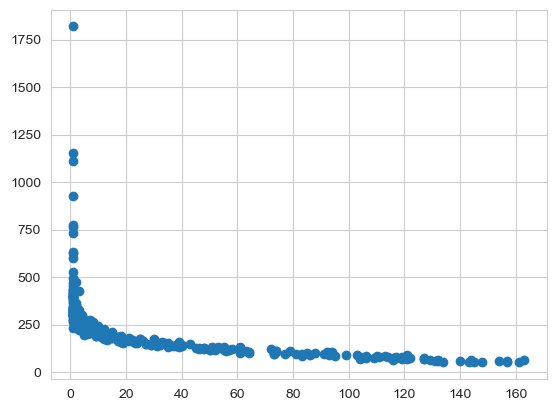

In [118]:
plt.scatter(numberOfNodes[50:], degrees_ints[50:])

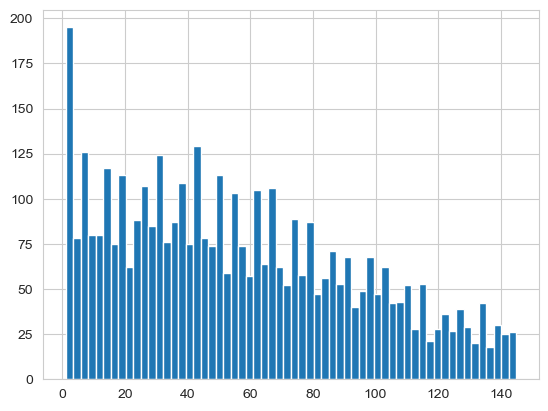

In [123]:
_ = plt.hist(dd[len(dd)//10:], bins=60)

In [177]:
pareto[:10]

array([ 0.01730304,  0.20240033, 13.42941668,  0.59921471,  0.12423946,
        0.25260412,  8.01987161,  0.10357978,  2.24346513,  0.60947404])

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_20567/1193777074.py:12: RuntimeWarning: invalid value encountered in cast
  pareto_dd = np.floor(pareto).astype(np.int32)


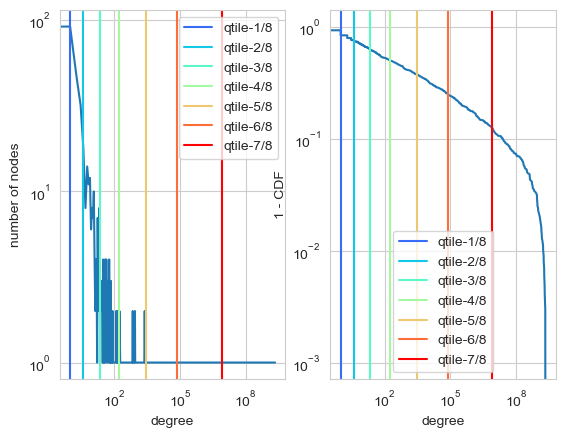

In [209]:
def powerlaw_dist(tau=2.5, x_min=1, size=1000):
    a = tau-1
    pareto = (np.random.pareto(a, size=size) + 1) * x_min
    return pareto

    # pdf: prop to x^-(a+1), i.e. tau = a+1
    # mean: ((tau-1) x_min)/(tau - 2) for tau > 2


tau = (2 + 1/70)
pareto = powerlaw_dist(tau=1.1)
pareto_dd = np.floor(pareto).astype(np.int32)
plot_degree_dist(pareto_dd, vlines=8)

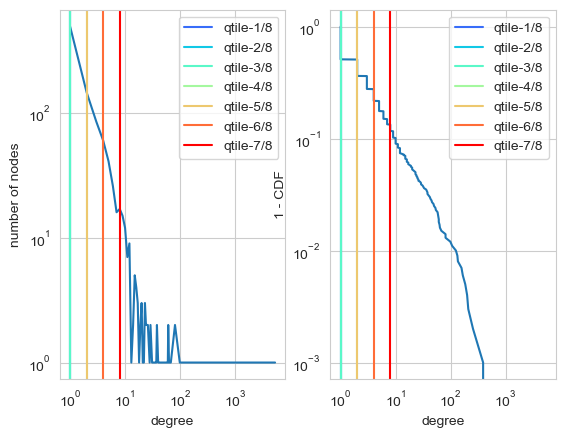

In [208]:
tau = (2 + 1/70)
pareto = powerlaw_dist(tau=tau)
pareto_dd = np.floor(pareto).astype(np.int32)
plot_degree_dist(pareto_dd, vlines=8)

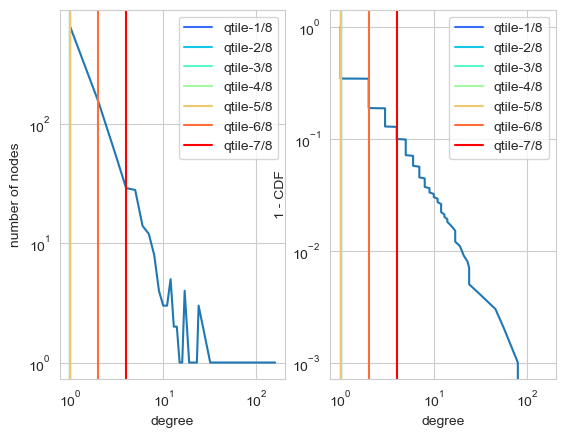

In [179]:
pareto = np.random.pareto(a=1.5, size=1000)
plot_degree_dist(pareto, vlines=8)
# dd = np.ceil(pareto).astype(np.int64)
# degrees, numberOfNodes = np.unique(dd, return_counts=True)
# # fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# plt.subplot(121)
# # plt.sca(axes[0])
# plt.xscale("log")
# plt.xlabel("degree")
# plt.yscale("log")
# plt.ylabel("number of nodes")
# # plt.scatter(degrees, numberOfNodes, s=1.1, marker='x')
# plt.plot(degrees, numberOfNodes)


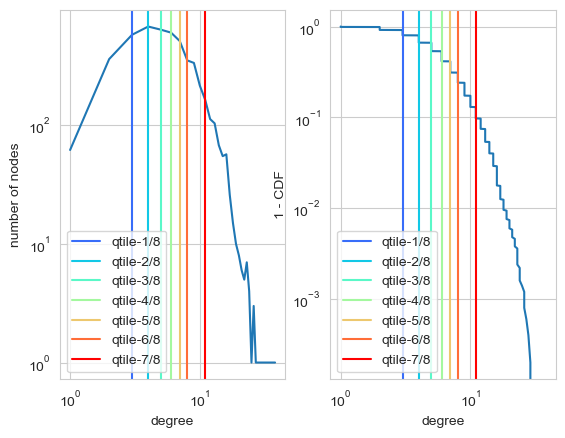

In [234]:
def F(x, k=0.5, pow=4):
    return 1 - np.exp(-(k * np.log(np.maximum(x, 1)))**pow)

def F_inv(z, k=0.5, pow=4):
    return np.exp(
        (- np.log(1 - z))**(1/pow) / k
    )

def sample_F(size=1000):
    us = np.random.uniform(size=size)
    ys = F_inv(us)
    return ys

# xs = np.arange(0, 50, 0.01)
# plt.plot(xs, F(xs))

ys = sample_F(5000)

ys_int = np.floor(ys).astype(np.int64)
plot_degree_dist(ys_int, vlines=8)

In [124]:
clgen = nk.generators.ChungLuGenerator(dd)
clg = clgen.generate()
clgdd = sorted(nk.centrality.DegreeCentrality(clg).run().scores(), reverse=True)

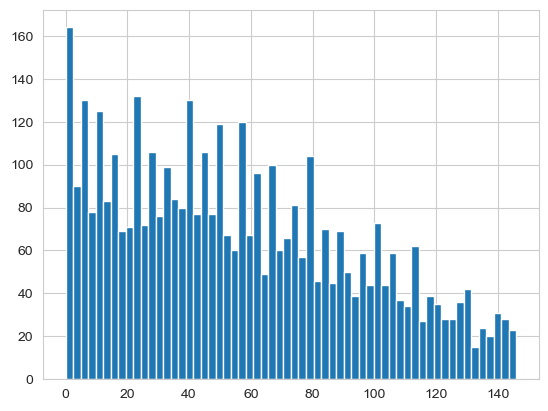

In [151]:
_ = plt.hist(clgdd[len(clgdd)//10:], bins=60)

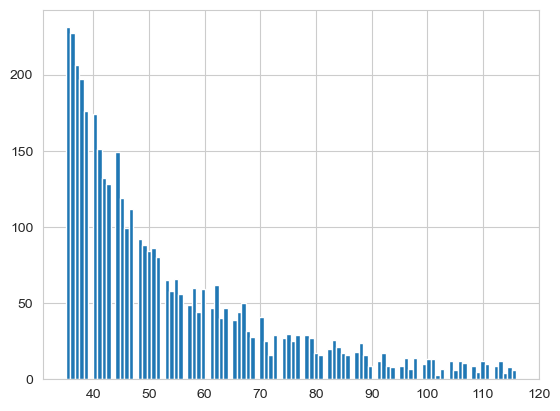

In [154]:
_ = plt.hist(badd[len(badd)//10:], bins=100)

In [153]:
degrees, numberOfNodes = np.unique(badd, return_counts=True)
numberOfNodes

array([231, 227, 206, 197, 176, 174, 151, 132, 128, 149, 119,  99, 112,
        92,  88,  84,  86,  80,  65,  58,  66,  56,  49,  60,  44,  59,
        47,  62,  40,  47,  39,  44,  50,  32,  28,  41,  25,  16,  29,
        27,  30,  25,  29,  29,  27,  17,  16,  20,  26,  21,  17,  16,
        18,  24,  16,   9,  12,  17,   9,   8,   9,  14,   7,  14,  10,
        13,  13,   3,   7,  12,   6,  12,  11,   9,   5,  12,  10,   9,
        12,   4,   8,   6,   5,   9,   7,  10,   5,   5,   4,   8,   5,
         5,  13,   9,   4,   5,   1,   3,   6,   2,   1,   4,   2,   7,
         2,   4,   7,   3,   4,   5,   6,   4,   1,   3,   1,  10,   4,
         3,   2,   5,   6,   1,   2,   4,   7,   4,   1,   2,   3,   4,
         1,   3,   1,   4,   5,   4,   2,   1,   1,   2,   2,   4,   1,
         3,   2,   3,   2,   1,   1,   2,   4,   4,   1,   1,   4,   2,
         2,   3,   2,   1,   4,   4,   1,   1,   1,   1,   3,   2,   5,
         2,   1,   2,   2,   1,   1,   2,   1,   2,   1,   1,   

In [235]:
bagen = nk.generators.BarabasiAlbertGenerator(35, 4563)
bag = bagen.generate()
badd = sorted(nk.centrality.DegreeCentrality(bag).run().scores(), reverse=True)

<Figure size 800x400 with 0 Axes>

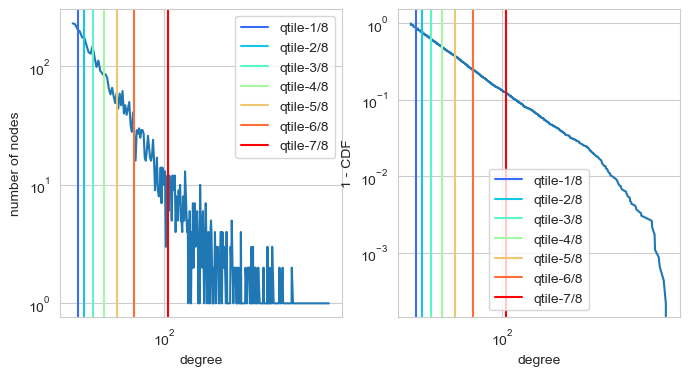

In [144]:
plt.figure(figsize=(8,4))
plot_degree_dist(bag, vlines=8)

[685.0,
 675.0,
 642.0,
 641.0,
 614.0,
 599.0,
 558.0,
 542.0,
 533.0,
 526.0,
 505.0,
 504.0,
 503.0,
 496.0,
 494.0,
 488.0,
 481.0,
 472.0,
 471.0,
 462.0,
 462.0,
 455.0,
 449.0,
 447.0,
 442.0,
 439.0,
 438.0,
 432.0,
 427.0,
 417.0,
 416.0,
 415.0,
 413.0,
 409.0,
 408.0,
 408.0,
 401.0,
 397.0,
 395.0,
 392.0,
 389.0,
 384.0,
 381.0,
 367.0,
 364.0,
 360.0,
 358.0,
 358.0,
 357.0,
 352.0,
 352.0,
 347.0,
 347.0,
 343.0,
 343.0,
 336.0,
 335.0,
 335.0,
 334.0,
 332.0,
 332.0,
 330.0,
 328.0,
 326.0,
 325.0,
 323.0,
 322.0,
 319.0,
 319.0,
 317.0,
 315.0,
 313.0,
 313.0,
 311.0,
 310.0,
 308.0,
 305.0,
 305.0,
 304.0,
 303.0,
 303.0,
 303.0,
 302.0,
 297.0,
 297.0,
 289.0,
 288.0,
 285.0,
 284.0,
 284.0,
 280.0,
 278.0,
 277.0,
 277.0,
 277.0,
 276.0,
 274.0,
 273.0,
 272.0,
 270.0,
 270.0,
 270.0,
 270.0,
 263.0,
 263.0,
 263.0,
 259.0,
 258.0,
 257.0,
 257.0,
 256.0,
 255.0,
 251.0,
 250.0,
 250.0,
 250.0,
 249.0,
 247.0,
 246.0,
 245.0,
 244.0,
 241.0,
 239.0,
 239.0,
 238.0,


<Figure size 800x400 with 0 Axes>

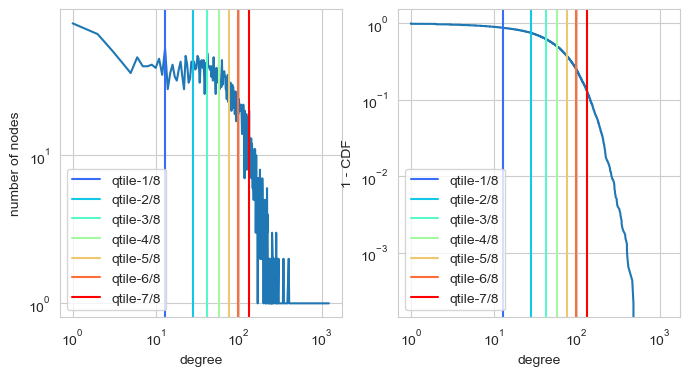

In [145]:
plt.figure(figsize=(8,4))
plot_degree_dist(g, vlines=8)

data/socfb/socfb-Simmons81.SpaceOne
nodes: 1518, avg degree: 43.4625


<Figure size 800x400 with 0 Axes>

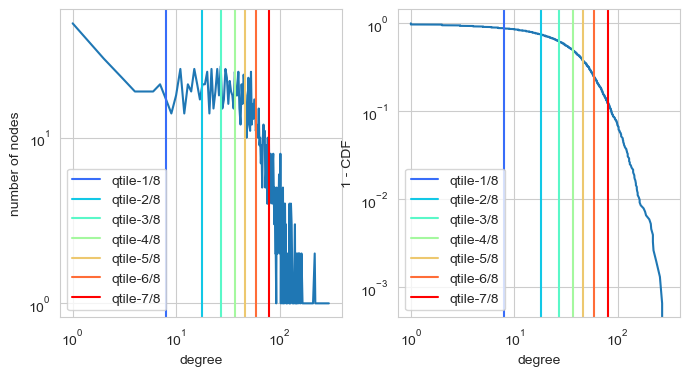

data/socfb/socfb-Harvard1.SpaceOne
nodes: 15126, avg degree: 109.0331


<Figure size 800x400 with 0 Axes>

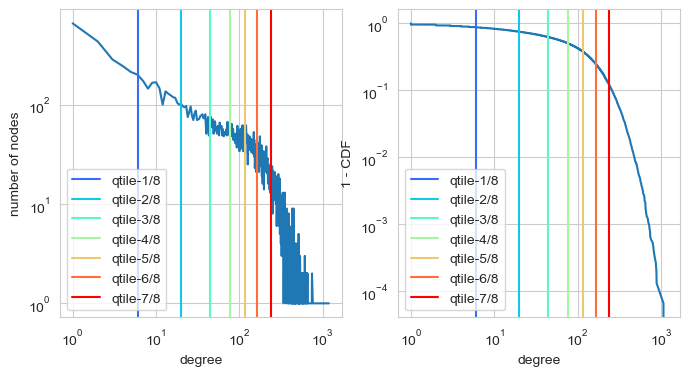

data/socfb/socfb-Howard90.SpaceOne
nodes: 4047, avg degree: 101.2355


<Figure size 800x400 with 0 Axes>

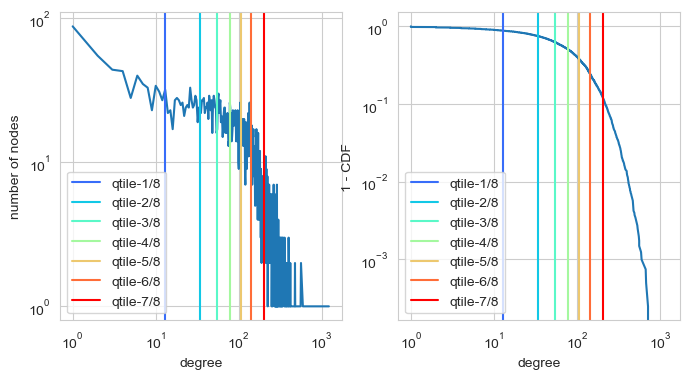

data/socfb/socfb-WashU32.SpaceOne
nodes: 7755, avg degree: 94.7881


<Figure size 800x400 with 0 Axes>

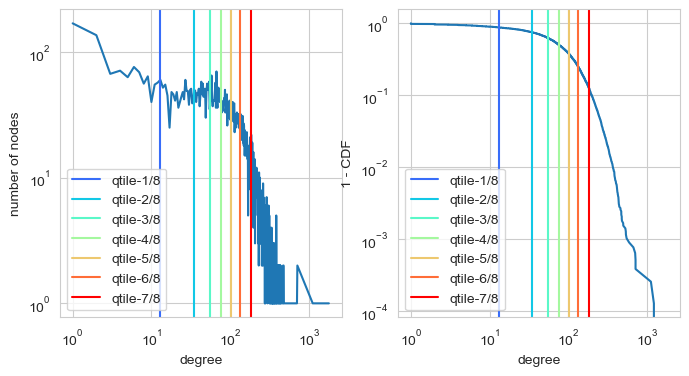

data/socfb/socfb-UMass92.SpaceOne
nodes: 16516, avg degree: 62.8948


<Figure size 800x400 with 0 Axes>

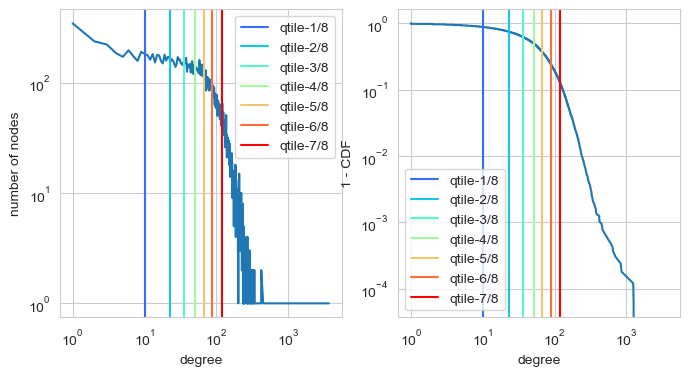

data/socfb/socfb-UConn91.SpaceOne
nodes: 17212, avg degree: 70.2847


<Figure size 800x400 with 0 Axes>

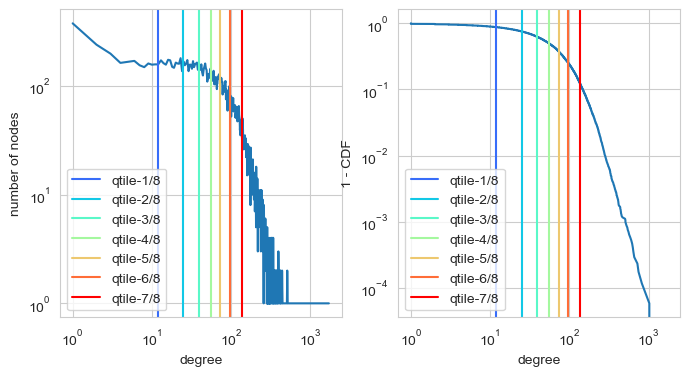

data/socfb/socfb-JMU79.SpaceOne
nodes: 14070, avg degree: 69.0212


<Figure size 800x400 with 0 Axes>

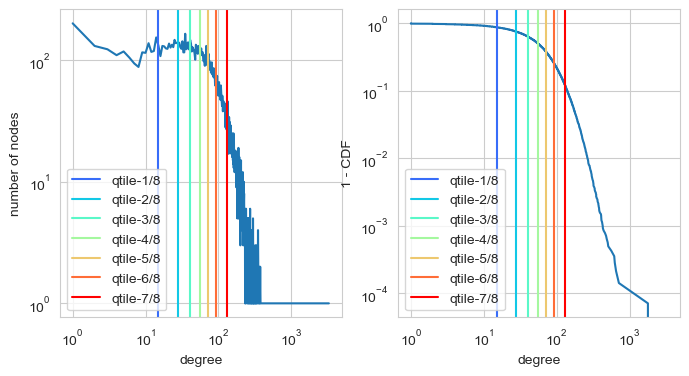

data/socfb/socfb-UCSC68.SpaceOne
nodes: 8991, avg degree: 49.9575


<Figure size 800x400 with 0 Axes>

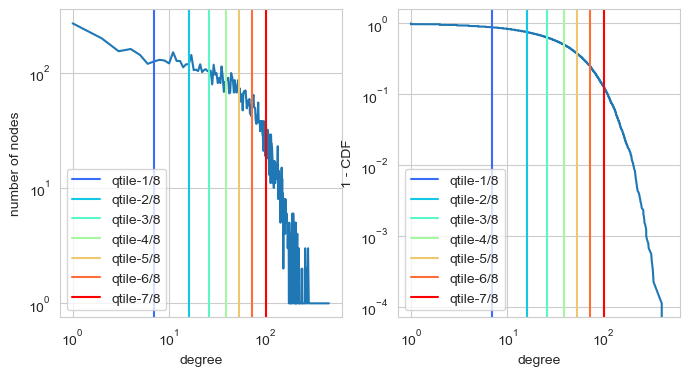

In [155]:
import glob
paths = np.random.choice(glob.glob(graph_folder + 'socfb-*'), 8)
for path in paths:
    g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)
    print(path)
    print(f'nodes: {g.numberOfNodes()}, avg degree: {2*g.numberOfEdges()/g.numberOfNodes():.4f}')
    dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
    # degrees, numberOfNodes = np.unique(dd, return_counts=True)
    # fit = powerlaw.Fit(dd)
    # print(f'percent nodes that look powerlawy: {len(fit.data)/len(fit.data_original):.4f}')
    plt.figure(figsize=(8,4))
    plot_degree_dist(g, vlines=8)
    plt.show()
    # _ = plt.hist(dd[len(dd)//10:], bins=100)
    # plt.show()

In [136]:
nk.overview(g)

Network Properties:
nodes, edges			21679, 715715
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.003046
clustering coefficient		0.194039
min/max/avg degree		1, 2315, 66.028415
degree assortativity		0.011059
number of connected components	24
size of largest component	21623 (99.74 %)


Network Properties:
nodes, edges			10000, 596460
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.011930
clustering coefficient		0.039202
min/max/avg degree		60, 1210, 119.292000
degree assortativity		0.365811
number of connected components	1
size of largest component	10000 (100.00 %)


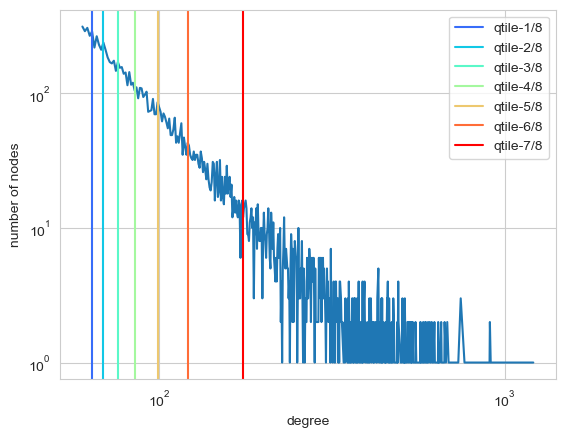

In [139]:
prefg = nk.generators.BarabasiAlbertGenerator(k=60, nMax=10000).generate()
nk.overview(prefg)
plot_degree_dist(prefg, vlines=8)

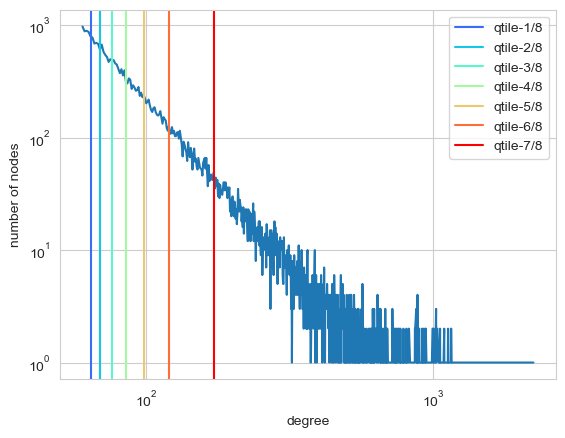

In [140]:
prefg = nk.generators.BarabasiAlbertGenerator(k=60, nMax=30000).generate()
plot_degree_dist(prefg, vlines=8)

In [146]:
dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
clgen = nk.generators.ChungLuGenerator(dd)
clg = clgen.generate()
nk.overview(clg)

Network Properties:
nodes, edges			21679, 715923
directed?			False
weighted?			False
isolated nodes			360
self-loops			0
density				0.003047
clustering coefficient		0.013294
min/max/avg degree		0, 2272, 66.047604
degree assortativity		0.297220
number of connected components	361
size of largest component	21319 (98.34 %)


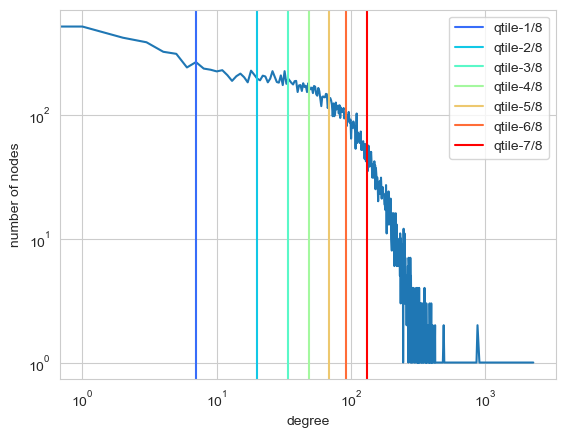

In [148]:
plot_degree_dist(clg, vlines=8)

/Users/benjidayan/Documents/GIRG_data/ca-Erdos992.SpaceOne
nodes: 6100, avg degree: 2.4639


<Figure size 800x400 with 0 Axes>

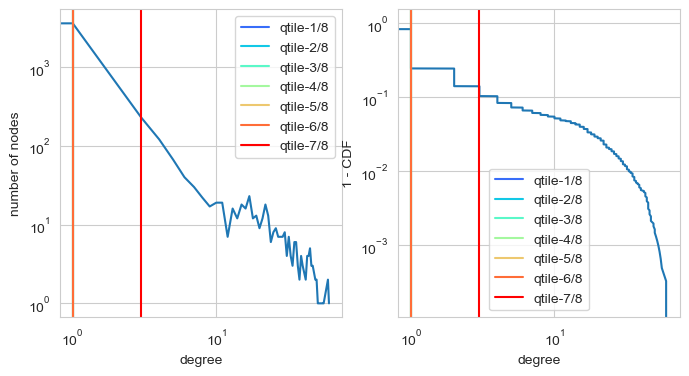

/Users/benjidayan/Documents/GIRG_data/ca-AstroPh.SpaceOne
nodes: 17903, avg degree: 22.0044


<Figure size 800x400 with 0 Axes>

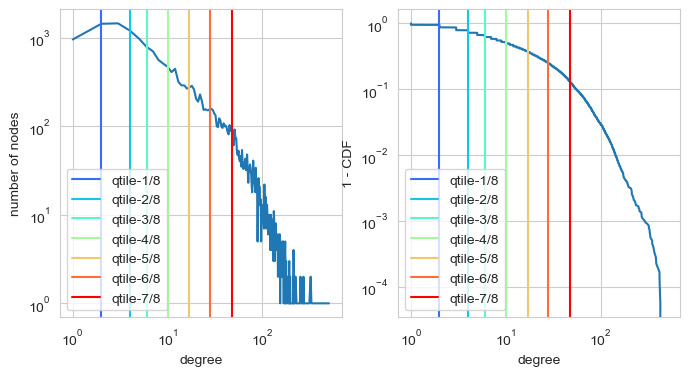

/Users/benjidayan/Documents/GIRG_data/ca-coauthors-dblp.SpaceOne
nodes: 540486, avg degree: 56.4149


<Figure size 800x400 with 0 Axes>

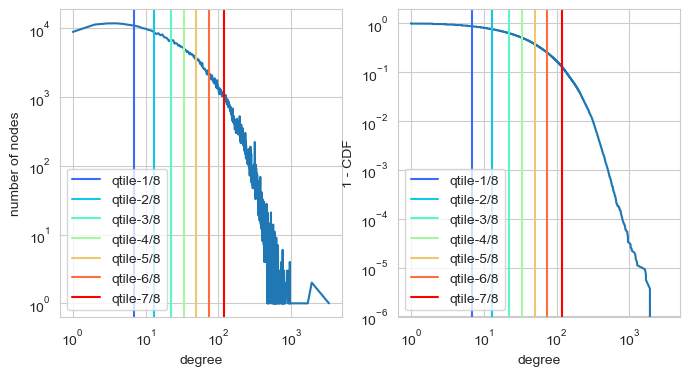

/Users/benjidayan/Documents/GIRG_data/ca-citeseer.SpaceOne
nodes: 227320, avg degree: 7.1629


<Figure size 800x400 with 0 Axes>

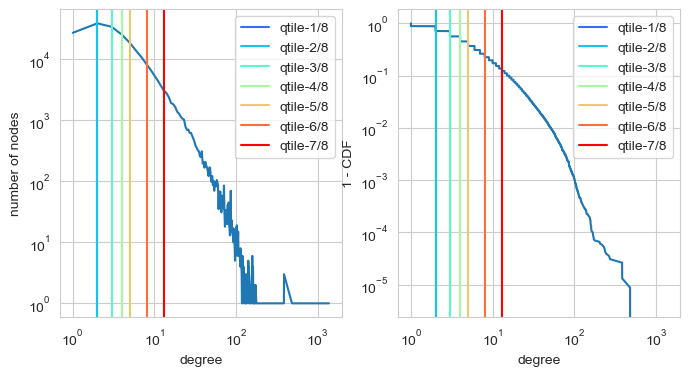

/Users/benjidayan/Documents/GIRG_data/ca-dblp-2010.SpaceOne
nodes: 226413, avg degree: 6.3288


<Figure size 800x400 with 0 Axes>

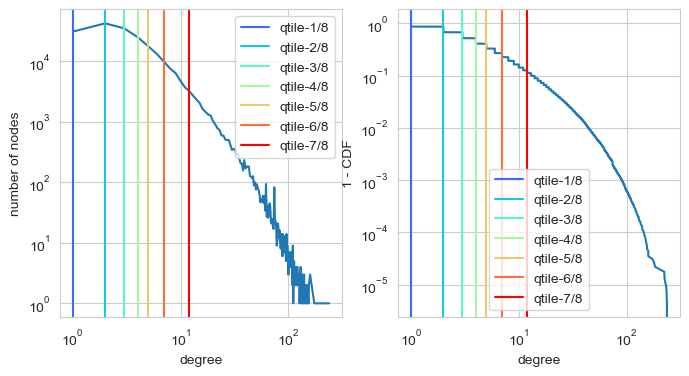

/Users/benjidayan/Documents/GIRG_data/ca-HepPh.SpaceOne
nodes: 11204, avg degree: 20.9959


<Figure size 800x400 with 0 Axes>

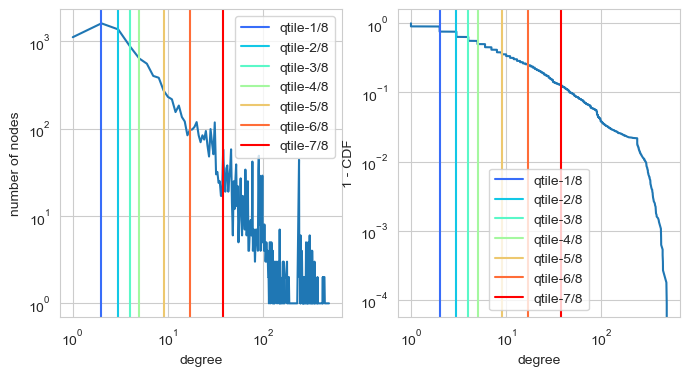

/Users/benjidayan/Documents/GIRG_data/ca-CondMat.SpaceOne
nodes: 21363, avg degree: 8.5462


<Figure size 800x400 with 0 Axes>

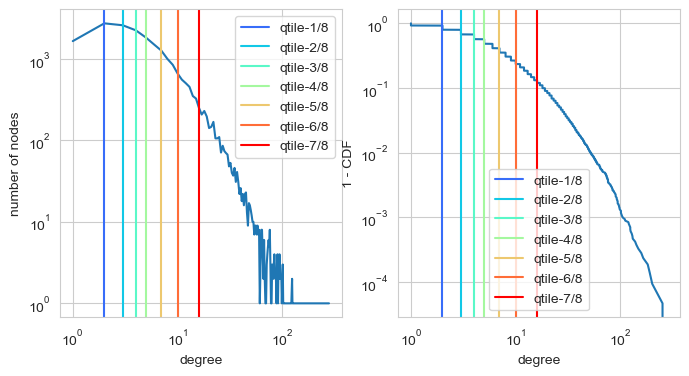

/Users/benjidayan/Documents/GIRG_data/ca-IMDB.SpaceOne
nodes: 896308, avg degree: 8.4401


<Figure size 800x400 with 0 Axes>

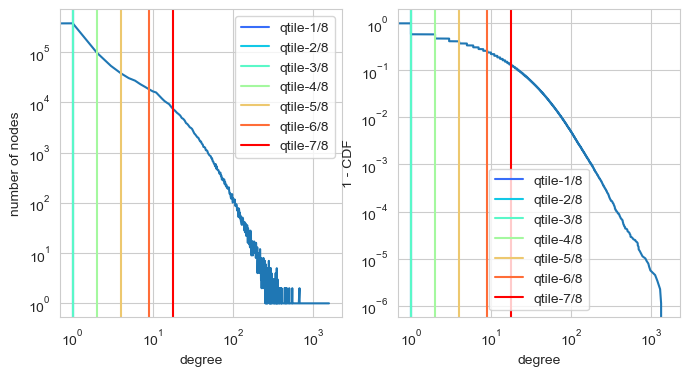

/Users/benjidayan/Documents/GIRG_data/ca-dblp-2012.SpaceOne
nodes: 317080, avg degree: 6.6221


<Figure size 800x400 with 0 Axes>

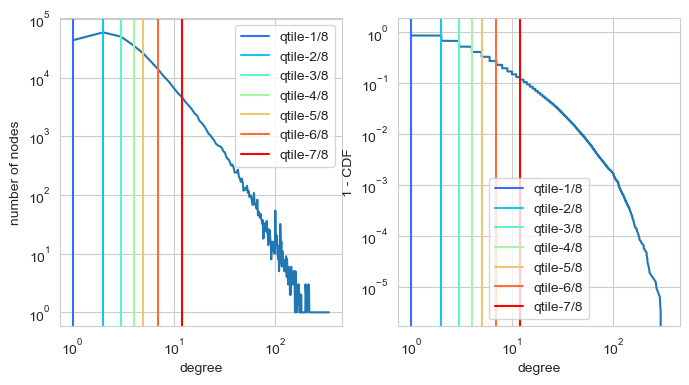

/Users/benjidayan/Documents/GIRG_data/ca-GrQc.SpaceOne
nodes: 4158, avg degree: 6.4560


<Figure size 800x400 with 0 Axes>

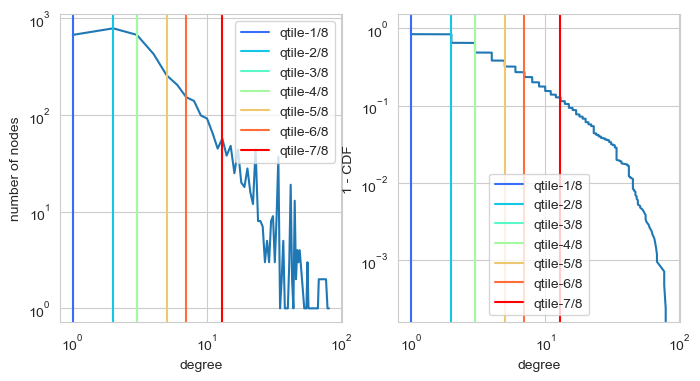

/Users/benjidayan/Documents/GIRG_data/ca-MathSciNet.SpaceOne
nodes: 332689, avg degree: 4.9334


<Figure size 800x400 with 0 Axes>

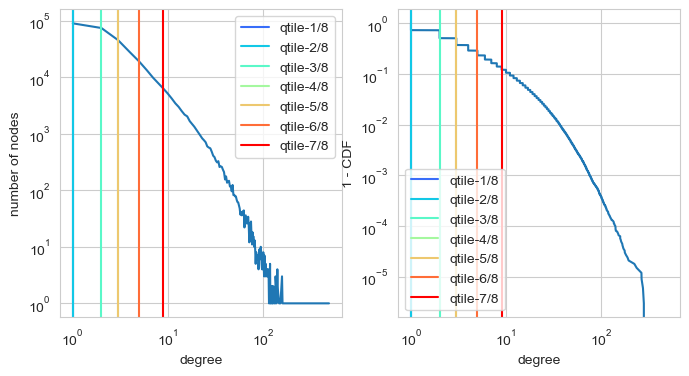

In [157]:
data_dir = '/Users/benjidayan/Documents/GIRG_data/'
colab_nets = glob.glob(data_dir + 'ca*.SpaceOne')
for path in colab_nets:
    g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)
    print(path)
    print(f'nodes: {g.numberOfNodes()}, avg degree: {2*g.numberOfEdges()/g.numberOfNodes():.4f}')
    plt.figure(figsize=(8, 4))
    plot_degree_dist(g, vlines=8)
    plt.show()

In [7]:

soc_networks = glob.glob(data_dir + 'soc-*.SpaceOne')
soc_networks


['/Users/benjidayan/Documents/GIRG_data/soc-hamsterster.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-gplus.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-slashdot.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-Slashdot0811.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-gowalla.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-sign-Slashdot090216.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-brightkite.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-sign-Slashdot081106.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-loc-brightkite.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-twitter-follows.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-catster.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-LiveMocha.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-epinions.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-twitter-follows-mun.SpaceOne',
 '/Users/benjidayan/Documents/GIRG_data/soc-Slashdot0

/Users/benjidayan/Documents/GIRG_data/soc-douban.SpaceOne
nodes: 154908, avg degree: 4.2240


<Figure size 400x400 with 0 Axes>

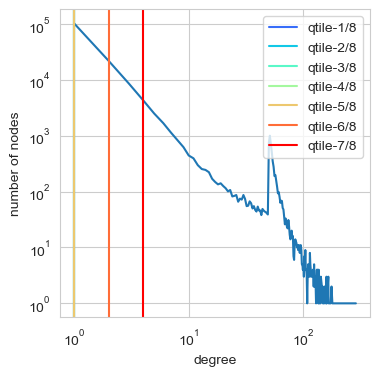

In [16]:
path = glob.glob(data_dir+'*douban*')[0]
g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)
print(path)
print(f'nodes: {g.numberOfNodes()}, avg degree: {2*g.numberOfEdges()/g.numberOfNodes():.4f}')
plt.figure(figsize=(4, 4))
plot_degree_dist(g, vlines=8)

/Users/benjidayan/Documents/GIRG_data/soc-LiveMocha.SpaceOne
nodes: 104103, avg degree: 42.1329


<Figure size 400x400 with 0 Axes>

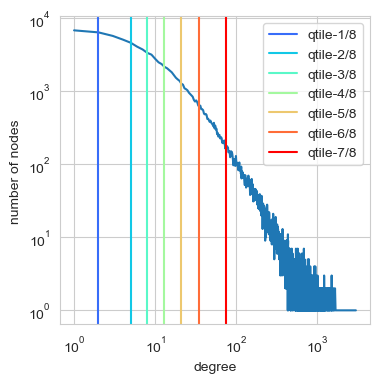

In [17]:
path = glob.glob(data_dir+'*LiveMocha*')[0]
g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)
print(path)
print(f'nodes: {g.numberOfNodes()}, avg degree: {2*g.numberOfEdges()/g.numberOfNodes():.4f}')
plt.figure(figsize=(4, 4))
plot_degree_dist(g, vlines=8)

/Users/benjidayan/Documents/GIRG_data/soc-dogster.SpaceOne
nodes: 426820, avg degree: 40.0477


<Figure size 400x400 with 0 Axes>

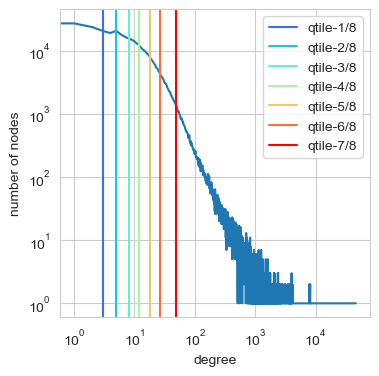

In [18]:
path = glob.glob(data_dir+'*dogster*')[0]
g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)
print(path)
print(f'nodes: {g.numberOfNodes()}, avg degree: {2*g.numberOfEdges()/g.numberOfNodes():.4f}')
plt.figure(figsize=(4, 4))
plot_degree_dist(g, vlines=8)

In [79]:
fit_bin_edges, fit_bin_proportions = fit.pdf()
fit_bin_middlesa
= [np.mean((fit_bin_edges[i], fit_bin_edges[i+1])) for i in range(len(fit_bin_edges)-1)]

In [78]:
np.mean(123, 123)

AxisError: axis 123 is out of bounds for array of dimension 0

In [20]:
import scipy.stats as stats
dir(stats)

['ConstantInputWarning',
 'Covariance',
 'DegenerateDataWarning',
 'FitError',
 'NearConstantInputWarning',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_axis_nan_policy',
 '_biasedurn',
 '_binned_statistic',
 '_binomtest',
 '_boost',
 '_common',
 '_constants',
 '_continuous_distns',
 '_covariance',
 '_crosstab',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_entropy',
 '_fit',
 '_hypotests',
 '_kde',
 '_ksstats',
 '_levy_stable',
 '_mannwhitneyu',
 '_morestats',
 '_mstats_basic',
 '_mstats_extras',
 '_multivariate',
 '_mvn',
 '_odds_ratio',
 '_page_trend_test',
 '_qmc',
 '_qmc_cy',
 '_rcont',
 '_relative_risk',
 '_resampling',
 '_rvs_sampling',
 '_sobol',
 '_statlib',
 '_stats',
 '_stats_mstats_common',
 '_stats_py',
 '_stats_pythran',
 '_tukeylambda_stats',
 '_variation',
 '_warnings_errors',
 'alexandergovern',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'an

0.3520653267642995

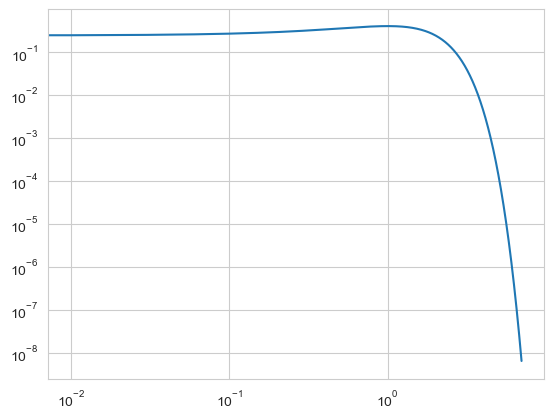

In [33]:
stats.norm.pdf(0.5)
xs = np.arange(-6, 6, step=0.01)
ys = stats.norm.pdf(xs)
plt.xscale('log')
plt.yscale('log')
plt.plot(xs+1, ys)
plt.show()

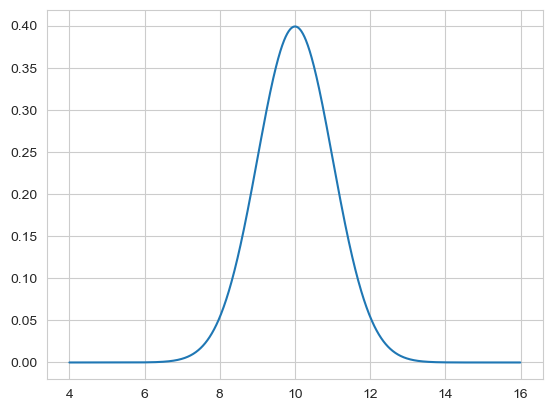

In [32]:
plt.plot(xs+10, ys)